# Product Association Analysis with Apriori

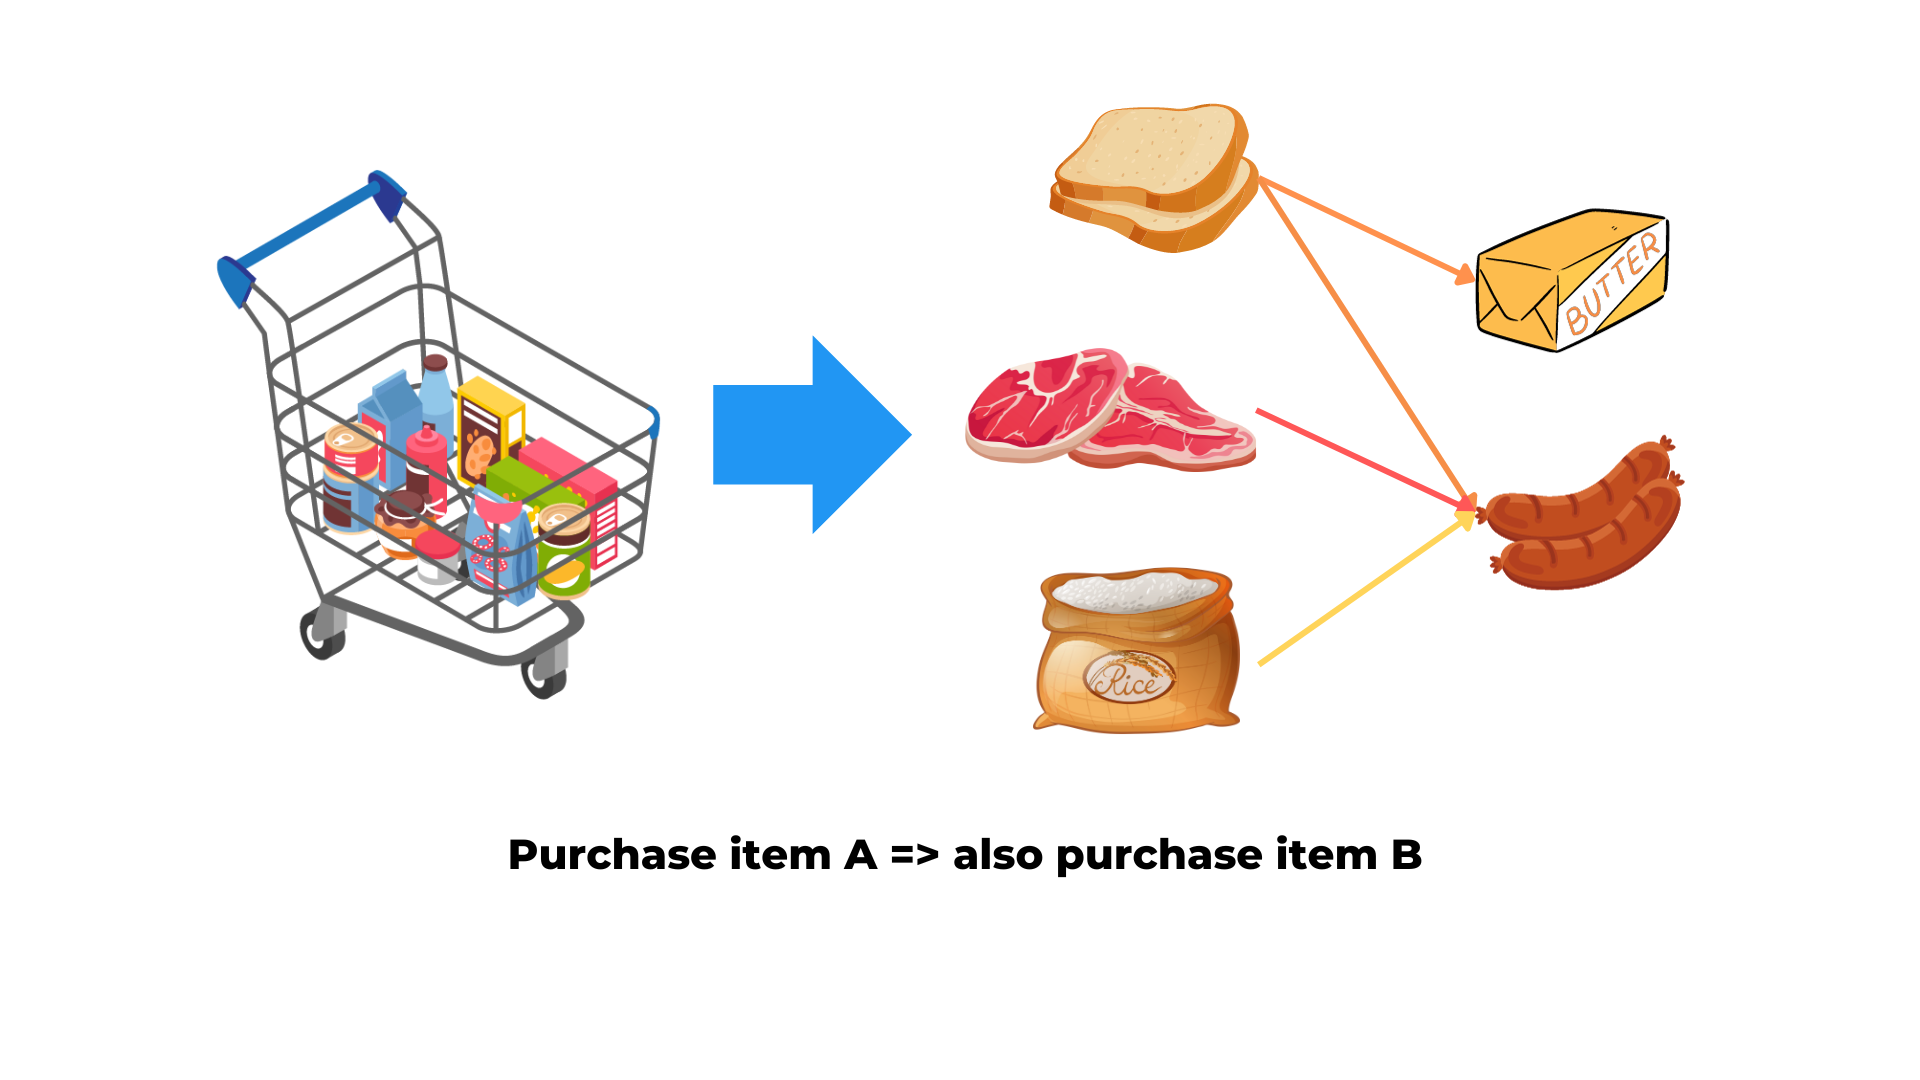!
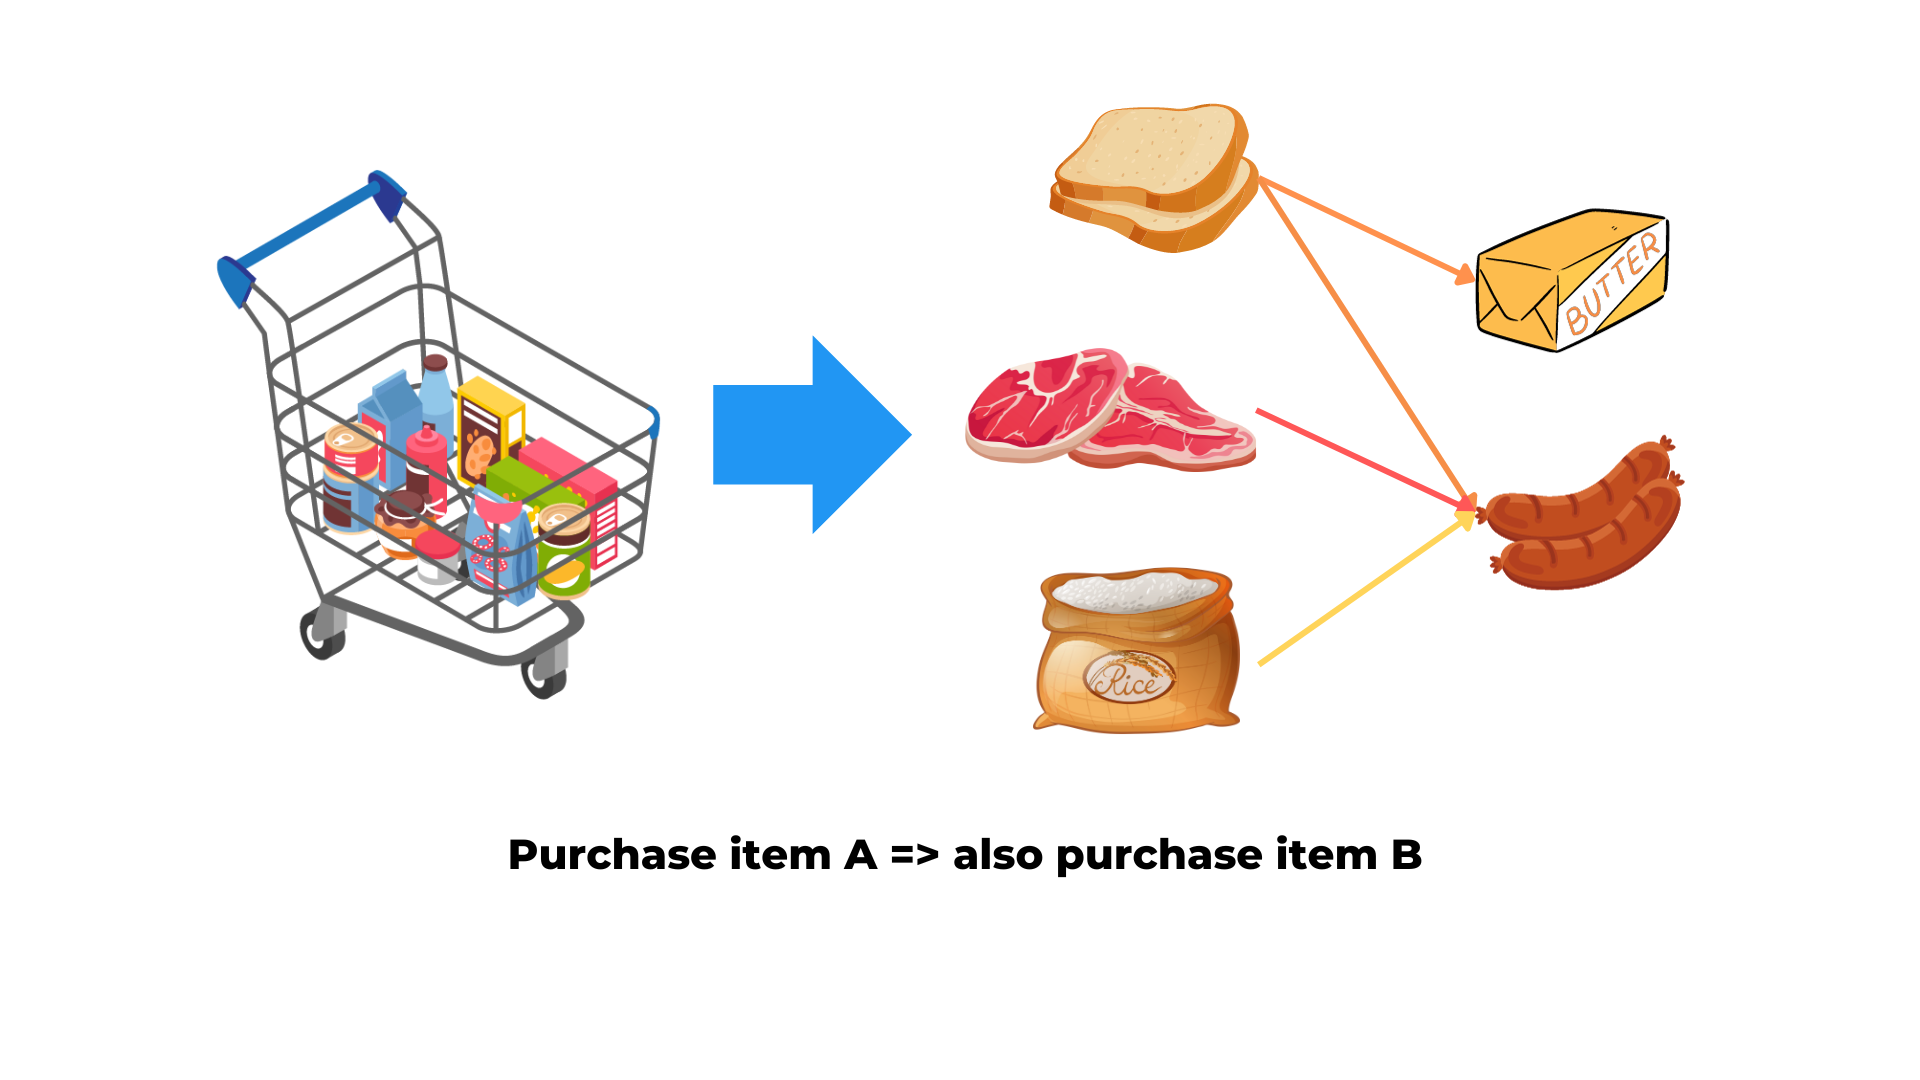

Apriori Algorithm: An Introduction
The Apriori algorithm is a classic method used in market basket analysis and association rule learning. It helps identify relationships or patterns between items in large datasets, like transactions in a store.

How It Works:
Identify Frequent Itemsets: The algorithm starts by identifying frequent single items that appear in many transactions.

Generate Itemsets: It then looks for larger itemsets by combining these frequent items, and identifies itemsets that appear together frequently.

Create Association Rules: Based on these frequent itemsets, the algorithm generates association rules to predict the likelihood of items being bought together.

Example of Association Rule:
Imagine you have a dataset of transactions, and the algorithm discovers that customers who buy milk also tend to buy bread. The rule might look like this:

"If a customer buys milk, they are likely to also buy bread."

This type of rule is useful for recommendation systems and product placement strategies.

Benefits of Apriori in Market Basket Analysis:
Identifies hidden patterns: Helps discover interesting relationships between products in a large dataset.
Improves sales: By identifying which items are often bought together, businesses can optimize product placement and promotions.
Data-driven decisions: It enables businesses to make better decisions based on real customer behavior.

Diagram of Apriori Process:

[Step 1: Find Frequent Itemsets] --> [Step 2: Generate Larger Itemsets] --> [Step 3: Create Associatio

In Summary:
The Apriori algorithm is an essential tool in market basket analysis for discovering valuable item relationships. It helps businesses predict customer preferences, ultimately leading to more effective sales strategies.

# Business Problem


Below is information about 3 different student baskets. Please refer to this cart information
Make the appropriate product amount using the association rule. Product recommendations 1 piece
or there may be more than 1. Decisions 2010-2011 for German customers
Derive from .

Product ID found in user 1's warehouse: 21987

Product ID in User 2's warehouse: 23235

Product ID found in user 3's warehouse: 22747

# Dataset Story

The data set named Online Retail II is based on the online sales data of a UK-based retail company between 01/12/2009 and 09/12/2011.
Contains transactions. The company's product catalog includes gift items and most of its customers are wholesalers.
available.

# Variables Descriptions

Invoice No: Invoice Number

StockCode : Product Code

Description: Product name

Quantity: Number of products

InvoiceDate: Invoice Date

UnitPrice : Invoice Price

CustomerID : Unique Customer Number

Country : Country Name

In [1]:
# import Required Libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Adjusting Row Column Settings
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
# çıktının tek bir satırda olmasını sağlar.
pd.set_option('display.expand_frame_repr', False)

# Task 1: Preparing the Data

**Step 1: Read the 2010-2011 sheet from the Online Retail II data set.**

In [3]:
df_ = pd.read_excel("/kaggle/input/association-rule-based-recommender-system/online_retail_II.xlsx",
                    sheet_name="Year 2010-2011", engine="openpyxl")
df = df_.copy()
df.head ()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541910.0,9.552234,-80995.0,1.0,3.0,10.0,80995.0,218.080957
InvoiceDate,541910,2011-07-04 13:35:22.342307840,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
Price,541910.0,4.611138,-11062.06,1.25,2.08,4.13,38970.0,96.759765
Customer ID,406830.0,15287.68416,12346.0,13953.0,15152.0,16791.0,18287.0,1713.603074


In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

**Step 2: Drop the observation units whose StockCode is POST. (POST is the price added to each invoice, it does not refer to the product.)**

In [6]:
df = df[~df['StockCode'].str.contains('POST', na=False)] #StockCode" sütununda "POST" olmayan satırları seçer.

**Step 3: Drop the observation units containing empty values.**

In [7]:
df = df.dropna() #veri setinde herhangi bir hücrede boş (NaN) değer bulunan satırları veri setinden çıkarır.

**Step 4: Remove the values ​​containing C in the Invoice from the data set. (C indicates cancellation of the invoice.)**

In [8]:
df = df[~df['Invoice'].str.contains('C', na=False)]

**Step 5: Filter the observation units whose Price value is less than zero**

In [9]:
df = df[df["Quantity"] > 0]  # miktarı 0 dan büyük olanları al
df = df[df["Price"] > 0]  # fiyatı da 0 dna büyük olanalrı al

**Step 6: Examine the outliers of the Price and Quantity variables and suppress them if necessary**

In [10]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,396785.0,13.016349,1.0,2.0,6.0,12.0,80995.0,179.579125
InvoiceDate,396785,2011-07-10 23:58:18.325339904,2010-12-01 08:26:00,2011-04-07 11:12:00,2011-07-31 14:39:00,2011-10-20 14:41:00,2011-12-09 12:50:00,NaN
Price,396785.0,3.037677,0.001,1.25,1.95,3.75,4161.06,17.829741
Customer ID,396785.0,15301.463886,12346.0,13975.0,15159.0,16801.0,18287.0,1709.852311


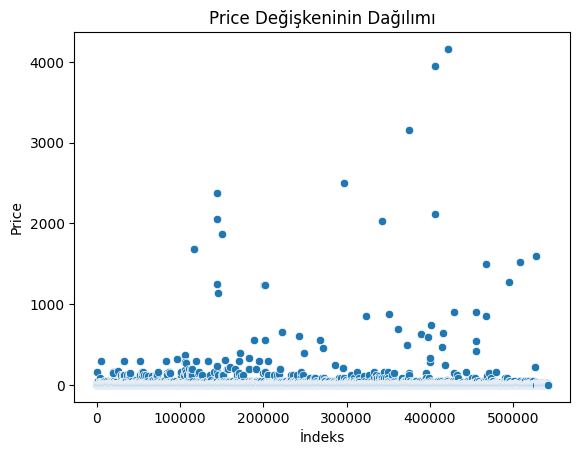

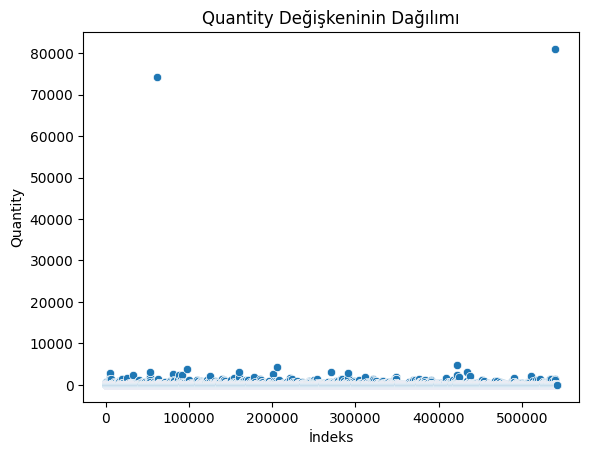

In [11]:
#SCAETTER GRAFİĞİ
import seaborn as sns
import matplotlib.pyplot as plt

def check_outliers(dataframe, column):
    """
    Verilen değişkenin (column) dağılımını incelemek için bir scatter plot oluşturur.
    Aynı zamanda, olası aykırı değerleri görselleştirmeye yardımcı olur.

    Parametreler:
    dataframe : pd.DataFrame
        Verilerin bulunduğu DataFrame.
    column : str
        Aykırı değerlerini kontrol etmek istediğiniz sütun adı.
    """
    # Scatter plot oluşturuluyor, x ekseni DataFrame'in index'i, y ekseni ise belirtilen sütun
    sns.scatterplot(x=dataframe.index, y=dataframe[column])
    plt.title(f'{column} Değişkeninin Dağılımı')
    plt.xlabel('İndeks')
    plt.ylabel(column)
    plt.show()

# İncelenecek sütunlar
columns_to_check = ['Price', 'Quantity']

# Her bir sütun için outlier kontrolü yapılıyor
for column in columns_to_check:
    check_outliers(df, column)

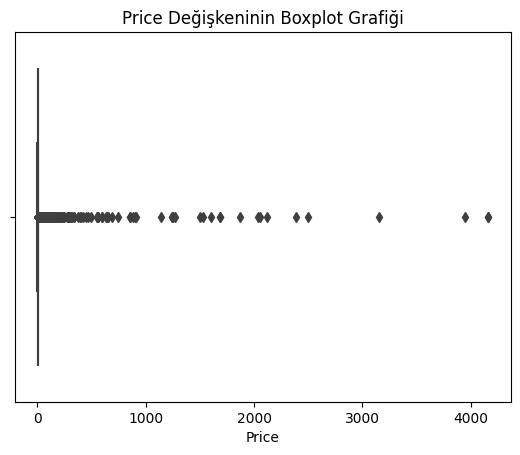

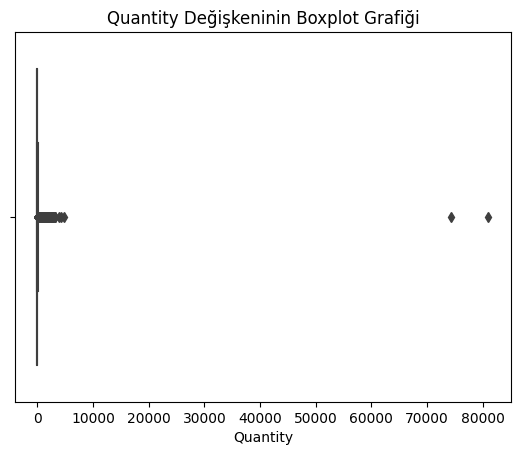

In [12]:
#BOXPLOT GRAFİĞİ
import seaborn as sns
import matplotlib.pyplot as plt

def check_outliers_boxplot(dataframe, column):
    sns.boxplot(x=dataframe[column])
    plt.title(f'{column} Değişkeninin Boxplot Grafiği')
    plt.xlabel(column)
    plt.show()

# Her bir sütun için boxplot kontrolü
for column in columns_to_check:
    check_outliers_boxplot(df, column)

In [13]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01) #yüzde 1 çeyrek değerini hesapla
    quartile3 = dataframe[variable].quantile(0.99) #yüzde 99 çeyrek değerini hesapla
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range #yüzde99 çeyrek değerden 1,5 uzaklıktaki değer benim üst limitimdir
    low_limit = quartile1 - 1.5 * interquantile_range #yüzde1 lik değerdeki 1.5 eksiğine git ve benim alt limitimdir.
    return low_limit, up_limit


In [14]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit   #low limitte aşağıda olanalrı low limit ile değiştir
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit    #up limitte fazla çıkanalrı up limitteki değeri ile değiştir

In [15]:
columns = ['Price', 'Quantity']
for col in columns:
    replace_with_thresholds(df, col)

In [16]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,396785.0,11.855703,1.0,2.0,6.0,12.0,298.5,25.55376
InvoiceDate,396785,2011-07-10 23:58:18.325339904,2010-12-01 08:26:00,2011-04-07 11:12:00,2011-07-31 14:39:00,2011-10-20 14:41:00,2011-12-09 12:50:00,NaN
Price,396785.0,2.835605,0.001,1.25,1.95,3.75,31.56,2.982371
Customer ID,396785.0,15301.463886,12346.0,13975.0,15159.0,16801.0,18287.0,1709.852311


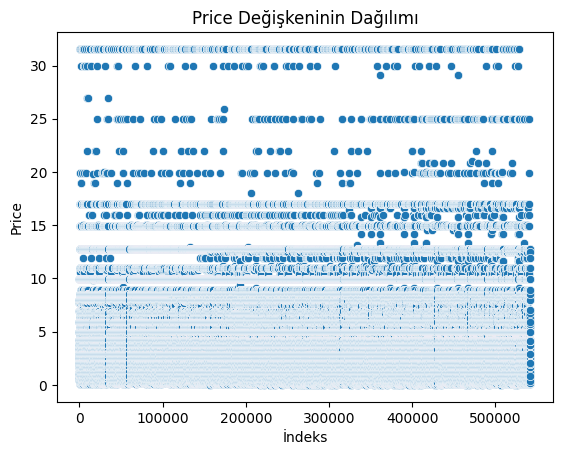

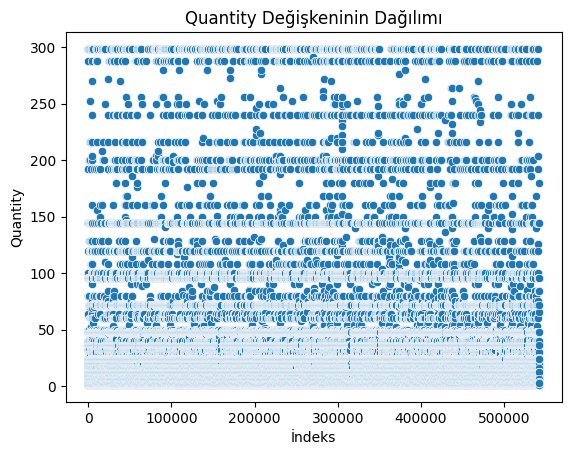

In [17]:
#SCATTER GRAFİĞİ
import seaborn as sns
import matplotlib.pyplot as plt

def check_outliers(dataframe, column):
    """
    Verilen değişkenin (column) dağılımını incelemek için bir scatter plot oluşturur.
    Aynı zamanda, olası aykırı değerleri görselleştirmeye yardımcı olur.

    Parametreler:
    dataframe : pd.DataFrame
        Verilerin bulunduğu DataFrame.
    column : str
        Aykırı değerlerini kontrol etmek istediğiniz sütun adı.
    """
    # Scatter plot oluşturuluyor, x ekseni DataFrame'in index'i, y ekseni ise belirtilen sütun
    sns.scatterplot(x=dataframe.index, y=dataframe[column])
    plt.title(f'{column} Değişkeninin Dağılımı')
    plt.xlabel('İndeks')
    plt.ylabel(column)
    plt.show()

# İncelenecek sütunlar
columns_to_check = ['Price', 'Quantity']

# Her bir sütun için outlier kontrolü yapılıyor
for column in columns_to_check:
    check_outliers(df, column)

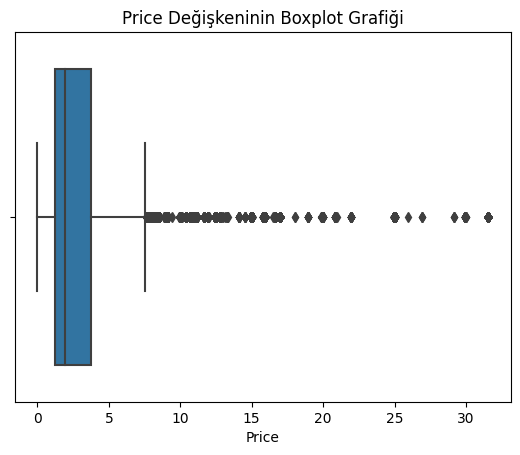

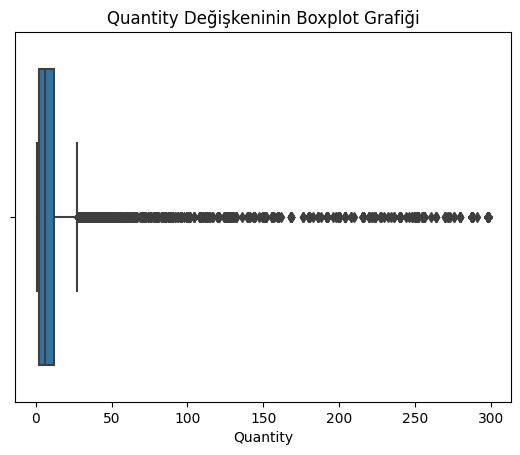

In [18]:
#BOXPLOT GRAFİĞİ
import seaborn as sns
import matplotlib.pyplot as plt

def check_outliers_boxplot(dataframe, column):
    sns.boxplot(x=dataframe[column])
    plt.title(f'{column} Değişkeninin Boxplot Grafiği')
    plt.xlabel(column)
    plt.show()

# Her bir sütun için boxplot kontrolü
for column in columns_to_check:
    check_outliers_boxplot(df, column)

# Task 2: Generating Association Rules through German Customers

**Step 1: Define the create_invoice_product_df function that will create the invoice product pivot table as follows.**

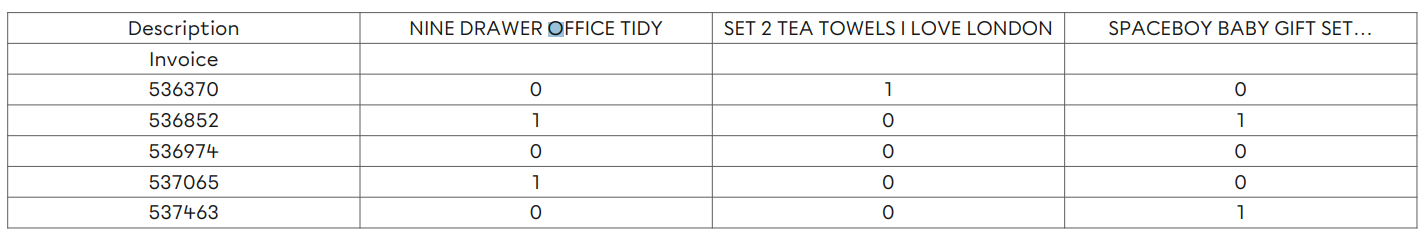

sütunlar da ürün isimleri, satırlarda fatura numarası _ işlemler, faturada bu ürün var mı yok mu 1 ve 0 ile ifade et



Product names in the columns, invoice number _ transactions in the rows, express with 1 and 0 whether this product is on the invoice or not.



In [19]:
df_ger = df[df["Country"]=="Germany"]
df_ger.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6.0,2010-12-01 13:04:00,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6.0,2010-12-01 13:04:00,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12.0,2010-12-01 13:04:00,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12.0,2010-12-01 13:04:00,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12.0,2010-12-01 13:04:00,1.95,12662.0,Germany


In [20]:
df_ger.groupby(["Invoice", "Description"]).agg({"Quantity": "sum"}).head ()

Quantity
Invoice Description                                  
536527  3 HOOK HANGER MAGIC GARDEN               12.0
        5 HOOK HANGER MAGIC TOADSTOOL            12.0
        5 HOOK HANGER RED MAGIC TOADSTOOL        12.0
        ASSORTED COLOUR LIZARD SUCTION HOOK      24.0
        CHILDREN'S CIRCUS PARADE MUG             12.0

In [21]:
#Description da yer alan ürün tanımlarını sütuna dönüştürmemiz gerekir
df_ger.groupby(['Invoice', 'Description']).agg({"Quantity": "sum"}).unstack().iloc[0:5, 0:5] #satırardan ve sütunlardan 5 er tame getir

Quantity                                                                                                      
Description 50'S CHRISTMAS GIFT BAG LARGE DOLLY GIRL BEAKER I LOVE LONDON MINI BACKPACK RED SPOT GIFT BAG LARGE SET 2 TEA TOWELS I LOVE LONDON 
Invoice                                                                                                                                        
536527                                NaN               NaN                         NaN                     NaN                             NaN
536840                                NaN               NaN                         NaN                     NaN                             NaN
536861                                NaN               NaN                         NaN                     NaN                             NaN
536967                                NaN               NaN                         NaN                     NaN                             NaN
536983                                NaN               NaN                         NaN                     NaN                             NaN

In [22]:
#boş olan yerlerde Nan ifadesi satın alındıysa sayı değerleri geldi
#buralarda NaN değeri yerine 0 sayı olan yerlere ise 1 yazsın
#Boşlukları 0 ile doldur
df_ger.groupby(['Invoice', 'Description']).agg({"Quantity": "sum"}).unstack().fillna(0).iloc[0:5, 0:5]

Quantity                                                                                                      
Description 50'S CHRISTMAS GIFT BAG LARGE DOLLY GIRL BEAKER I LOVE LONDON MINI BACKPACK RED SPOT GIFT BAG LARGE SET 2 TEA TOWELS I LOVE LONDON 
Invoice                                                                                                                                        
536527                                0.0               0.0                         0.0                     0.0                             0.0
536840                                0.0               0.0                         0.0                     0.0                             0.0
536861                                0.0               0.0                         0.0                     0.0                             0.0
536967                                0.0               0.0                         0.0                     0.0                             0.0
536983                                0.0               0.0                         0.0                     0.0                             0.0

In [23]:
#sayı olan yerleri gezip 0 dan büyük olan yerlere 1 yazacak:
df_ger.groupby(['Invoice', 'Description']). \
    agg({"Quantity": "sum"}). \
    unstack(). \
    fillna(0). \
    applymap(lambda x: 1 if x > 0 else 0).iloc[0:5, 0:5]  #applymap apply fonk kardeşidir. Applymap bütün gözlemleri gez dmektir.

Quantity                                                                                                      
Description 50'S CHRISTMAS GIFT BAG LARGE DOLLY GIRL BEAKER I LOVE LONDON MINI BACKPACK RED SPOT GIFT BAG LARGE SET 2 TEA TOWELS I LOVE LONDON 
Invoice                                                                                                                                        
536527                                  0                 0                           0                       0                               0
536840                                  0                 0                           0                       0                               0
536861                                  0                 0                           0                       0                               0
536967                                  0                 0                           0                       0                               0
536983                                  0                 0                           0                       0                               0

In [24]:
#Description yerine ıdler yazılması gerekir
df_ger.groupby(['Invoice', 'StockCode']). \
    agg({"Quantity": "sum"}). \
    unstack(). \
    fillna(0). \
    applymap(lambda x: 1 if x > 0 else 0).iloc[0:5, 0:5]

Quantity                        
StockCode    10002 10125 10135 11001 15034
Invoice                                   
536527           0     0     0     0     0
536840           0     0     0     0     0
536861           0     0     0     0     0
536967           0     0     0     0     0
536983           0     0     0     0     0

In [25]:
#Fonksiyon yazalım ve description istersem tanımı versin ıd istersem ıd veren bir fonksiyon
def create_invoice_product_df(dataframe, id=False):
    if id:
        return dataframe.groupby(['Invoice', "StockCode"])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)
    else:
        return dataframe.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)

ger_inv_pro_df = create_invoice_product_df(df_ger, id=True)

**Step 2: Define the create_rules function that will create the rules and find the rules for German customers.**

In [26]:
frequent_itemsets = apriori(ger_inv_pro_df,
                            min_support=0.01,
                            use_colnames=True)

In [27]:
frequent_itemsets.sort_values("support", ascending=False).head ()

,support,itemsets
189,0.249443,(22326)
191,0.160356,(22328)
242,0.140312,(22554)
220,0.140312,(22423)
1590,0.133630,"(22328, 22326)"


In [28]:
from mlxtend.frequent_patterns import association_rules

# frequent_itemsets daha önce hesaplanmış olmalı
rules = association_rules(frequent_itemsets,
                          metric="support",
                          min_threshold=0.01,
                          num_itemsets=3)  # Burada num_itemsets parametresini ekliyoruz

**As a Function**

In [29]:
def create_rules(dataframe, id=True, country="Germany"):
    dataframe = dataframe[dataframe['Country'] == country]
    dataframe = create_invoice_product_df(dataframe, id)
    frequent_itemsets = apriori(dataframe, min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01,num_itemsets=3)
    return rules


rules = create_rules(df_ger)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(16237),(22326),0.011136,0.249443,0.011136,1.000000,4.008929,1.0,0.008358,inf,0.759009,0.044643,1.000000,0.522321
1,(22326),(16237),0.249443,0.011136,0.011136,0.044643,4.008929,1.0,0.008358,1.035073,1.000000,0.044643,0.033884,0.522321
2,(20674),(20675),0.022272,0.033408,0.013363,0.600000,17.960000,1.0,0.012619,2.416481,0.965831,0.315789,0.586175,0.500000
3,(20675),(20674),0.033408,0.022272,0.013363,0.400000,17.960000,1.0,0.012619,1.629547,0.976959,0.315789,0.386333,0.500000
4,(20674),(20676),0.022272,0.037862,0.011136,0.500000,13.205882,1.0,0.010293,1.924276,0.945330,0.227273,0.480324,0.397059


# Task 3: Making Product Recommendations to Users Given Product Ids in the Basket

**Step 1: Find the names of the given products using the check_id function**

In [30]:
#Idnin hangi tanıma karşılık geldiğini öğrenmek istersek bu fonk kullan
def check_id(dataframe, stock_code):
    product_name = dataframe[dataframe["StockCode"] == stock_code][["Description"]].values[0].tolist()
    print(product_name)

In [31]:
product_ids = {'user_1_product_id': 21987, 'user_2_product_id': 23235, 'user_3_product_id': 22747}

def check_id(dataframe, StockCode):
    product_name = dataframe[dataframe['StockCode'] == StockCode][['Description']].values[0].tolist()
    print(product_name)

for key, value in product_ids.items():
    print('\n############################')
    print(f'For {key}, the recommended product is :'), check_id(df_ger, value)


############################
For user_1_product_id, the recommended product is :
['PACK OF 6 SKULL PAPER CUPS']

############################
For user_2_product_id, the recommended product is :
['STORAGE TIN VINTAGE LEAF']

############################
For user_3_product_id, the recommended product is :
["POPPY'S PLAYHOUSE BATHROOM"]


**Step 2: Recommend products for 3 users using the arl_recommender function.**

In [32]:
# ARL (Association Rule Learning) tabanlı öneri sistemi
# Bu fonksiyon, belirli bir ürün için en yüksek lift değerine sahip önerileri döndürür.
def arl_recommender(rules_df, product_id, recommend_count=1):
    # 1. `rules_df`'yi "lift" değerine göre azalan sırayla sıralıyoruz.
    sorted_rules = rules_df.sort_values('lift', ascending=False)

    # 2. Öneri listemizi başlatıyoruz.
    recommendation_list = []

    # 3. `sorted_rules['antecedents']` (öncüller) üzerinden döngü başlatıyoruz.
    for i, product in enumerate(sorted_rules['antecedents']):
        # 4. Eğer "antecedent" birden fazla üründen oluşuyorsa, her birini kontrol ediyoruz.
        for j in list(product):
            # 5. Eğer "antecedent" ürün, verilen `product_id` ile eşleşiyorsa,
            if j == product_id:
                # 6. Eşleşen kuralın "consequents" kısmından ilk ürünü öneri listesine ekliyoruz.
                recommendation_list.append(list(sorted_rules.iloc[i]['consequents'])[0])

    # 7. Öneri listesinin ilk `recommend_count` kadarını döndürüyoruz.
    return recommendation_list[0: recommend_count]

# Ürün ID'lerine dayalı olarak öneri yapmak için kullanılan döngü
# `product_ids` sözlüğünde her ürün için öneri yapılır.
for k, v in product_ids.items():
    # `if product_ids[k] == v:` koşulu yapılmış.
    if product_ids[k] == v:
        # 8. `arl_recommender` fonksiyonu çağrılır ve öneriler yazdırılır.
        print(f'The product to be recommended for {k} are {arl_recommender(rules, v, recommend_count=1)}')


The product to be recommended for user_1_product_id are [21989]
The product to be recommended for user_2_product_id are [23244]
The product to be recommended for user_3_product_id are [22746]


**Step 3: Look at the names of the products to be recommended.**

In [33]:
# Önerilen ürünler ve kullanıcıların bu ürünleri alacak ID'leri
recommended_ids = {'recommended_user_1_product_id': [21086],
                   'recommended_user_2_product_id': [23244],
                   'recommended_user_3_product_id': [22745]}

# `check_product` fonksiyonu, her bir ürün ID'sini kontrol eder.
# Bu fonksiyon, kullanıcının önerilen ürünlerini alır ve her birini kontrol eder.
def check_product(dataframe, user_product_id):
    # 1. `user_product_id` listesinde döngü başlatılır.
    for i in user_product_id:
        # 2. Her bir ürün ID'sini `check_id` fonksiyonuna göndeririz.
        check_id(dataframe, i)

# `recommended_ids` sözlüğünde her bir kullanıcı için önerilen ürünleri kontrol etmek.
for k, v in recommended_ids.items():
    # 3. Kullanıcı adı ve önerilen ürünleri yazdırıyoruz.
    print(f'\n################ {k} ###################')
    # 4. `check_product` fonksiyonu, her bir kullanıcının önerilen ürünleri ile çalışır.
    check_product(df_ger, v)



################ recommended_user_1_product_id ###################
['SET/6 RED SPOTTY PAPER CUPS']

################ recommended_user_2_product_id ###################
['ROUND STORAGE TIN VINTAGE LEAF']

################ recommended_user_3_product_id ###################
["POPPY'S PLAYHOUSE BEDROOM "]
